In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../input/heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
x = data.iloc[:,:-1].values
y = data.iloc[:,13].values

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [6]:
x_train[1:5]

array([[6.90e+01, 1.00e+00, 3.00e+00, 1.60e+02, 2.34e+02, 1.00e+00,
        0.00e+00, 1.31e+02, 0.00e+00, 1.00e-01, 1.00e+00, 1.00e+00,
        2.00e+00],
       [6.10e+01, 1.00e+00, 0.00e+00, 1.40e+02, 2.07e+02, 0.00e+00,
        0.00e+00, 1.38e+02, 1.00e+00, 1.90e+00, 2.00e+00, 1.00e+00,
        3.00e+00],
       [3.90e+01, 1.00e+00, 2.00e+00, 1.40e+02, 3.21e+02, 0.00e+00,
        0.00e+00, 1.82e+02, 0.00e+00, 0.00e+00, 2.00e+00, 0.00e+00,
        2.00e+00],
       [6.40e+01, 1.00e+00, 0.00e+00, 1.28e+02, 2.63e+02, 0.00e+00,
        1.00e+00, 1.05e+02, 1.00e+00, 2.00e-01, 1.00e+00, 1.00e+00,
        3.00e+00]])

In [7]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [8]:
x_train

array([[ 0.835114  ,  0.73989544,  0.0315114 , ...,  0.955317  ,
        -0.69264875, -0.42921768],
       [ 1.61651954,  0.73989544,  1.94020175, ..., -0.67796691,
         0.29286491, -0.42921768],
       [ 0.72348464,  0.73989544, -0.92283378, ...,  0.955317  ,
         0.29286491,  1.13964695],
       ...,
       [ 0.16533783,  0.73989544,  1.94020175, ..., -0.67796691,
        -0.69264875,  1.13964695],
       [-0.83932643,  0.73989544,  0.98585657, ...,  0.955317  ,
        -0.69264875, -0.42921768],
       [ 0.38859655,  0.73989544,  0.0315114 , ..., -0.67796691,
        -0.69264875, -0.42921768]])

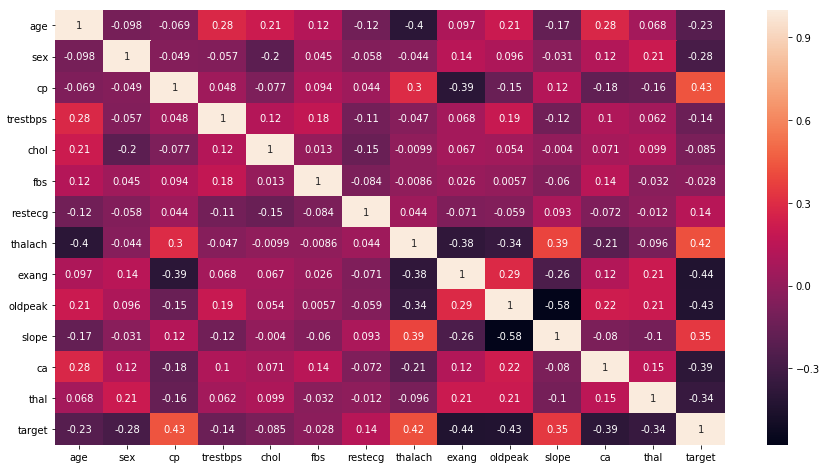

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
'''Naive Bayes'''

'Naive Bayes'

In [13]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train,y_train)
y_pref=clf.predict(x_test)
clf.score(x_test, y_test)*100

80.21978021978022

In [14]:
"""Logistic Regression"""

'Logistic Regression'

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0])

In [17]:
classifier.score(x_test, y_test)*100

81.31868131868131

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8131868131868132

In [19]:
"""KNN"""

'KNN'

In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 6)
clf.fit(x_train,y_train)
y_pref=clf.predict(x_test)
clf.score(x_test, y_test)*100

86.81318681318682

In [21]:
"""Decision Tree Classifier"""

'Decision Tree Classifier'

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf1.fit(x_train,y_train)
y_pref=clf1.predict(x_test)
clf1.score(x_test, y_test)*100

74.72527472527473

In [23]:
"""Random forest"""

'Random forest'

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=13)
clf.fit(x_train,y_train)
y_pref=clf.predict(x_test)
clf.score(x_test, y_test)*100

82.41758241758241

In [25]:
"""Support Vector Classifier"""

'Support Vector Classifier'

In [26]:
from sklearn.svm import SVC
clf2 = SVC()
clf2.fit(x_train,y_train)
y_pref=clf.predict(x_test)
clf2.score(x_test, y_test)*100

81.31868131868131